# FLIP (02) Optimization Data Science

---
Team Director: Meng Ren | mren@tulip.academy<br />

TULIP Academy <br />
http://www.tulip.academy 

---

# Quadrature

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

## Numerical Quadrature

The aim of numerical quadrature is to compute

$$\int_a^b f(x) \, \text{d}x$$

where $f$ is a real function of a single variable $x$.

More complex integrals are best evaluated by analytical reduction to a
(set of) integral(s) in the form above.

Here we will always assume that $f(x)$ is finite within $[a, b]$, and
frequently we will implicitly assume that it is differentiable.

## The simplest quadrature

Standard situation: the value of the function is known (or can be
evaluated) at a set of points or *nodes*.

The simplest evaluation of the quadrature uses the Riemann integral: a
rectangular area is computed for each node, and the total integral is
the sum of these areas.

## Function representation

The simple rule from the Riemann integral is not very accurate. Most
improvements change how the function is represented using a finite
amount of information.

Simplest assumption: know the *values* $f(x_j)$ at nodes $x_j$. This
does not give us complete information about the function.

We need information about how the function behaves away from the nodes.
We *assume* the function behaves in a suitably simple way, so that the
resulting *interpolating function* is easy to use.

If the interpolating function is integrable then we are done; compute
the integrals between each node and sum.

The choice of interpolating function is definitely not unique. With
quadrature this is not so much of an issue.

A different assumption is that we can compute the function at any point
in the interval, but that we wish to do this as little as possible.

We then pick the nodes and the interpolating function to get the highest
degree of accuracy possible. If the nodes are chosen based on the values
of the function $f$ itself then this is an *adaptive* algorithm.


Another possibility is that we might know (or compute) the coefficients
of the function with respect to some basis, such as the Fourier
coefficients

$$f(x) \simeq \sum_{n=1}^N a_n \sin \left(\frac{2 \pi n}{L}
              x\right).$$

Use linearity to compute the integral of each basis function, and
compute the total integral using the appropriate weighted sum.

## Polynomial interpolation

The general class of methods that have the name of *Newton-Cotes*
formulae are simple and robust. They make the following assumptions:

-   The function $f(x)$ is known (or can be evaluated) at a finite set
    of nodes $\{x_j\}$, with $j = 0, \dots, N$, in the interval
    $[a, b]$.

-   An interpolating function $g(x)$ is found that passes through these
    points, i.e.

    $$g(x_j) = f(x_j) \left( = f_j \right), \quad j = 0, \dots, N.$$

-   The interpolating function is a polynomial or piecewise polynomial.

-   The integral is computed from the exact integral of $g(x)$ over the
    interval.

Different methods based on the order of the polynomials used and
restrictions on the nodes.

## Trapezoidal rule

The trapezoidal rule uses an interpolating polynomial $g(x)$ of order 1:
a straight line.


Hence

$$\int_a^b f(x) \, \text{d}x = \tfrac{1}{2} (b - a) \left[ f(b) +
              f(a) \right].$$


Very inaccurate unless the interval is small or $f(x)$ is very boring.


Instead use the *composite* trapezoidal rule. Divide interval into $N$
equal subintervals length

$$h = (b - a) / N,$$

and apply trapezoidal rule to each.


Resulting interpolation polynomial $g$ is *piecewise* linear. Area in
each subinterval is

$$A_j = \tfrac{1}{2} (x_j - x_{j-1}) \left[ f(x_j) + f(x_{j-1})
            \right].$$

### Composite Trapezoidal Rule

From each subinterval the area is

$$A_j = \tfrac{1}{2} (x_j - x_{j-1}) \left[ f(x_j) + f(x_{j-1})
              \right]$$

and we obtain the full answer by summing each segment to get

$$\int_a^b f(x)\, \text{d}x = \tfrac{h}{2} \sum_{j=1}^N
              \left[ f_j + f_{j-1} \right]$$


This is often written as

$$\begin{aligned}
              \int_a^b f(x)\, \text{d}x& = \tfrac{h}{2} \left(f_0 +
                f_N\right) \\&+ h \left(f_1 + \dots f_{N-1} \right).
            \end{aligned}$$

## Error analysis

To compute the error from a composite quadrature rule we bound the error
in any subinterval. This will depend on the width of the interval, $h$.

We firstly write the trapezoidal rule on one interval as

$$A_j = \tfrac{h}{2} \left(f_j + f_{j+1}\right).$$

If we Taylor expand $f_{j+1}$ about $f_j$ we have

$$A_j = h f_j + \tfrac{h^2}{2} f'_j + \tfrac{h^3}{4} f^{(2)}_j + \dots$$

To find the error, we need the exact result in powers of $h$. So define

$$F(t) = \int_{x_j}^{x_j + t} f(x) \, \text{d}x$$

so that

$$F(h) = \int_{x_j}^{x_{j+1}} f(x) \, \text{d}x.$$

We note that

$$\frac{\text{d}^n F}{\text{d}t^n} = f^{(n-1)}(x_j + t)$$

or in particular

$$\frac{\text{d} F}{\text{d}t} = f(x_j + t).$$


From this we can Taylor expand about $t=0$ to find

$$F(h) = F(0) + h \left. \frac{\text{d}F}{\text{d}t} \right|_{t=0}
    + \dots$$

From the definition of $\text{d}F / \text{d}t$ we have

$$F(h) = h f_j + \tfrac{h^2}{2} f'_j + \tfrac{h^3}{6} f^{(2)}_j + \dots.$$

Comparing with the trapezoidal rule

$$F(h) \simeq A_j = h f_j + \tfrac{h^2}{2} f'_j + \tfrac{h^3}{4}
    f^{(2)}_j + \dots$$

the error in the subinterval is

$$| A_j - F(h) | \leq \tfrac{h^3}{12} |f^{(2)}_j| .$$

Summing over all $N$ subintervals and using $h N = (b - a)$ gives

$$\text{Error} \leq \frac{(b - a) h^2}{12} M_2, \quad M_2 =
    \max_{x\in[a,b]} | f^{(2)}(x) |.$$

## Example

We look at

$$\int_0^{\pi / 2} \sin(x) \, \text{d}x$$

using the trapezoidal rule. The exact answer is 1.

With three points $x_j = \{0, \pi / 4, \pi / 2\}$ we have $h =
       \pi / 4$ and

|  $j$  |   $x_j$     |    $f_j$         |
|:-----:|:-----------:|:----------------:|
|  $0$  |      $0$    |     $0$          |
|  $1$  |  $\pi / 4$  | $1 / \sqrt{2}$   |
|  $2$  |  $\pi / 2$  |       $1$        |

So

$$\begin{aligned}
         \int_0^{\pi / 2} \sin(x) \, \text{d}x & \simeq \frac{\pi / 4}{2}
         \left( 0 + 1 \right) + \pi / 4 \left( \tfrac{1}{\sqrt{2}} \right)
         \\
         & = \tfrac{\pi}{8} \left( 1 + \sqrt{2} \right) \\
         & \simeq 0.948.
       \end{aligned}$$



With four points $x_j = \{0, \pi / 6, \pi / 3, \pi / 2\}$ we have
$h = \pi / 6$ and

|   $j$ |    $x_j$    |     $f_j$        |
|:-----:|:-----------:|:----------------:|
|  $0$  |    $0$      |     $0$          |
|  $1$  |  $\pi / 6$  |    $1 / 2$       |
|  $2$  |  $\pi / 3$  | $\sqrt{3} / 2$   |
|  $3$  |  $\pi / 2$  |     $1$          |

So

$$\begin{aligned}
        \int_0^{\pi / 2} \sin(x) \, \text{d}x & \simeq \frac{\pi / 6}{2}
        \left( 0 + 1 \right) + \pi / 6 \left( \tfrac{1}{2} +
          \tfrac{\sqrt{3}}{2} \right)
        \\
        & = \tfrac{\pi}{12} \left( 2 + \sqrt{3} \right) \simeq 0.977.
      \end{aligned}$$

The example converges as expected with resolution.

In [3]:
def trapezoidal_quadrature(fn, a, b, N):
    """Integrate the function fn of one variable x over the interval [a, b] using the trapezoidal rule with N+1 nodes."""
    import numpy as np
    
    nodes = np.linspace(a, b, N+1)
    values = fn(nodes)
    
    h = (b - a) / float(N)
    
    return 0.5 * h * (values[0] + values[-1] + 2.0 * np.sum(values[1:-1]))

def fn_sin(x):
    """Function used in quadrature example - fn = sin(x)."""
    import numpy as np
    
    return np.sin(x)

# Check the examples above
print("The quadrature of sin(x) between 0, pi/2, using N=2 is {}.".format(trapezoidal_quadrature(fn_sin, 0.0, np.pi / 2.0, 2)))
print("The quadrature of sin(x) between 0, pi/2, using N=3 is {}.".format(trapezoidal_quadrature(fn_sin, 0.0, np.pi / 2.0, 3)))

The quadrature of sin(x) between 0, pi/2, using N=2 is 0.9480594489685199.
The quadrature of sin(x) between 0, pi/2, using N=3 is 0.9770486166568532.


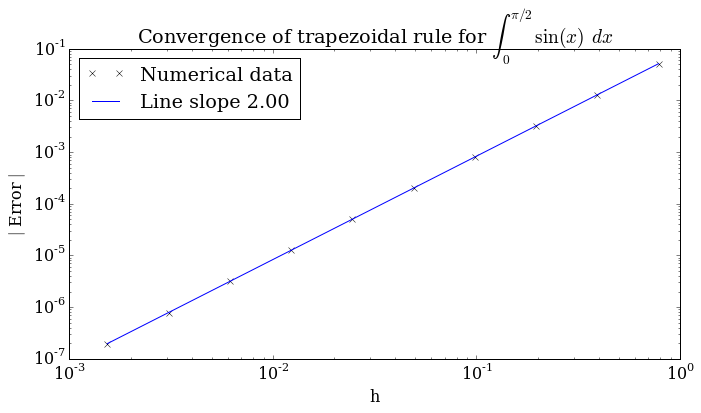

In [4]:
# Now show the behaviour with resolution

Npoints = np.array([2**i for i in range(1, 11)])
h = np.pi / 2.0 / Npoints
err = np.zeros_like(h)
for i in range(len(Npoints)):
    N = Npoints[i]
    quad = trapezoidal_quadrature(fn_sin, 0.0, np.pi / 2.0, N)
    err[i] = np.abs(1.0 - quad)

# Find the best fit to the data: if err ~ A h^s then the best fit straight line of log(err) vs log(h) has slope s.
p = np.polyfit(np.log(h), np.log(err), 1)
    
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.loglog(h, err, 'kx', label = 'Numerical data')
ax.loglog(h, np.exp(p[1])*h**(p[0]), 'b-', label = "Line slope {:.2f}".format(p[0]))
ax.set_xlabel('h')
ax.set_ylabel('$\|$ Error $\|$')
ax.set_title('Convergence of trapezoidal rule for $\int_0^{\pi/2} \sin(x) \, dx$')
ax.legend(loc = 2)
fig.tight_layout()
plt.show()